# Data Exploration:

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')



import clean

In [2]:
df = pd.read_csv('KS_train_data.csv')

In [3]:
df

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,"I will be an artist-in-residence at Elsewhere Studios this summer, where I will stretch my wings and see where I land!",art,3596,US,1325980505,USD,1334866560,1.000000,...,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.000000,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program,https://www.kickstarter.com/projects/hilaryemersonlay/elsewhere-studios-artist-in-residency-program/rewards
1,KS_000001,82,1000 Artists is a public art-making installation on the Washington Mall which will occur on January 21 and 22nd 2013.,art,4586,US,1330926084,USD,1336440145,1.000000,...,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.000000,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013,https://www.kickstarter.com/projects/17146650/1000-artists-presidential-inauguration-2013/rewards
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneHenge"" celebrates Community across Virtual and Real Worlds.",art,5217,US,1332382894,USD,1338175739,1.000000,...,1332991739,MyPhoneHenge,5217.00,False,5217.000000,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/myphonehenge,https://www.kickstarter.com/projects/belveal/myphonehenge/rewards
3,KS_000003,37,A film exploring the role and value of art education today through the history of the seminal California Institute of the Arts.,art,7160,GB,1332342451,USD,1334806096,1.000000,...,1332991696,Walk-Through,7160.00,False,7160.000000,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/1078130915/walk-through,https://www.kickstarter.com/projects/1078130915/walk-through/rewards
4,KS_000004,153,"We need to build a kitchen for Habitable Spaces, a self sustaining farm and artist residency on a ranch in Texas.",art,15445,US,1328562617,USD,1335584240,1.000000,...,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.000000,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces,https://www.kickstarter.com/projects/1044092769/a-kitchen-for-habitable-spaces/rewards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,KS_099995,104,Make the workshop/ small stage space at Jimmy's No 43 even better than before!,theater,7595,US,1348677893,USD,1356552252,1.000000,...,1353960252,"Help Fund the ""Back Room"" Arts Space at Jimmy's No 43!",7595.43,False,7595.430000,"New York, NY",True,spaces,https://www.kickstarter.com/projects/jimmycarbone/help-fund-the-back-room-arts-space-at-jimmys-no-43,https://www.kickstarter.com/projects/jimmycarbone/help-fund-the-back-room-arts-space-at-jimmys-no-43/rewards
99996,KS_099996,307,Help create a permanent home for live comedy shows and classes in Downtown RVA.,theater,27196,US,1364939099,USD,1367674009,1.000000,...,1365082009,The Coalition Theater,27196.71,False,27196.710000,"Richmond, VA",True,spaces,https://www.kickstarter.com/projects/rvacomedy/the-coalition-theater-0,https://www.kickstarter.com/projects/rvacomedy/the-coalition-theater-0/rewards
99997,KS_099997,143,"Voix de Ville is a pop-up imaginarium of neo-vaudeville, musical extravaganza, circus arts, comedy, and theatre in a tiny circus tent!",theater,7226,US,1366078694,USD,1373738400,1.000000,...,1370568560,The Voix De Ville! : A Pop-up Theater and Cabaret,7226.00,True,7226.000000,"Cleveland, OH",True,spaces,https://www.kickstarter.com/projects/1601712092/the-voix-de-ville-a-pop-up-theater-and-cabaret,https://www.kickstarter.com/projects/1601712092/the-voix-de-ville-a-pop-up-theater-and-cabaret/rewards
99998,KS_099998,329,Help Synetic Theater create a new Studio to produce

In [8]:
df.describe()

,created_at,deadline,fx_rate,goal,launched_at,dbl,dbd
count,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,1.400524e+09,1.406896e+09,1.017654,4.447512e+04,1.403972e+09,39.431820,33.626200
std,6.334581e+07,6.340574e+07,0.169773,1.256033e+06,6.360489e+07,103.415866,12.935002
min,1.240366e+09,1.243556e+09,0.009337,1.000000e-02,1.240674e+09,0.000000,1.000000
25%,1.349203e+09,1.357171e+09,1.000000,1.500000e+03,1.354313e+09,2.000000,30.000000
50%,1.408426e+09,1.415244e+09,1.000000,5.000000e+03,1.412373e+09,9.000000,30.000000
75%,1.447206e+09,1.454243e+09,1.000000,1.200000e+04,1.451252e+09,32.000000,36.000000
max,1.517539e+09,1.518702e+09,1.401112,1.000000e+08,1.518037e+09,2220.000000,92.000000


The following are all of the current features in our dataset. We make a distinction between categorical and numerical data.

In [25]:
print('There are {} features\n'.format(len(df.columns)))
df.columns

There are 19 features



Index(['project_id', 'blurb', 'category', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'staff_pick',
       'location', 'funded', 'subcategory', 'project_url', 'reward_url', 'dbl',
       'dbd'],
      dtype='object')

In [28]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical features\n'.format(len(categorical)))
print('The categorical features are :\n\n', categorical)

There are 10 categorical features

The categorical features are :

 ['project_id', 'blurb', 'category', 'country', 'currency', 'name', 'location', 'subcategory', 'project_url', 'reward_url']


In [29]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']

print('There are {} numerical features\n'.format(len(numerical)))
print('The numerical features are :\n\n', numerical)

There are 9 numerical features

The numerical features are :

 ['created_at', 'deadline', 'fx_rate', 'goal', 'launched_at', 'staff_pick', 'funded', 'dbl', 'dbd']


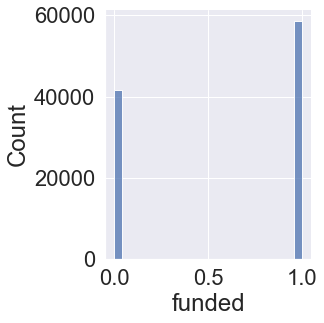

In [6]:
# distribution of funded campaigns 
sns.displot(df.funded.transform(int))
# almost 59% were funded project and 39% not

<AxesSubplot:>

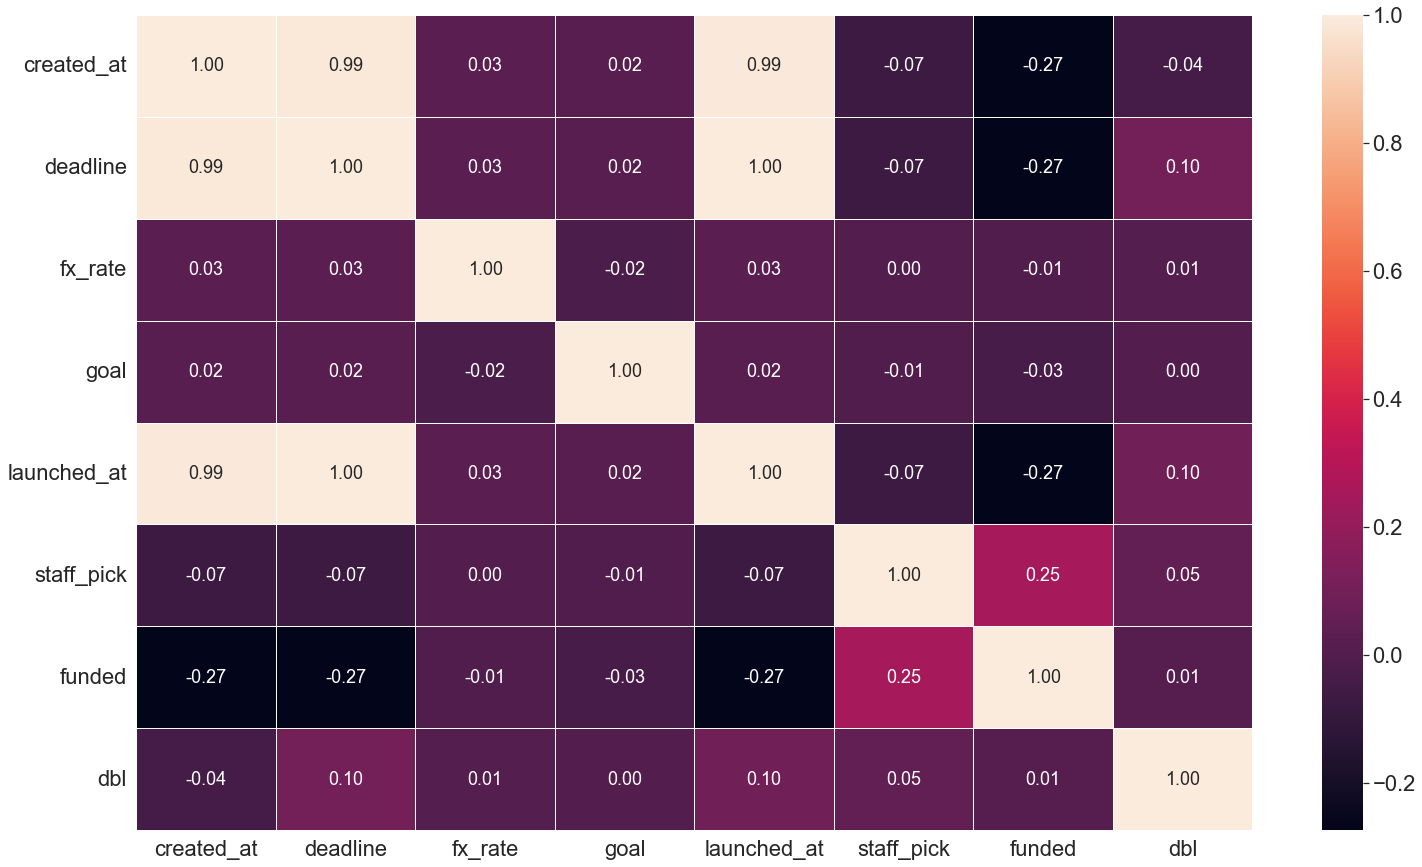

In [31]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(25,15))         # Sample figsize in inches
sns.set(font_scale=2)
sns.heatmap(corrmat, annot=True, linewidths=.5, ax=ax, fmt = ".2f", annot_kws={"size":18})

From the heat map, not much could be said about the data, except that the number of backers (backer_count) correlates witht the pledged money. Other than that, is that there is a small correlation (o.25) between staff_pick and funded. There is also some correlation with the times that we will not go into as those are most probably not very informative.

However, we know that the heat map does not show us any categorical data. Hence, we plot some could-be interesting features.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='launched_at', ylabel='deadline'>

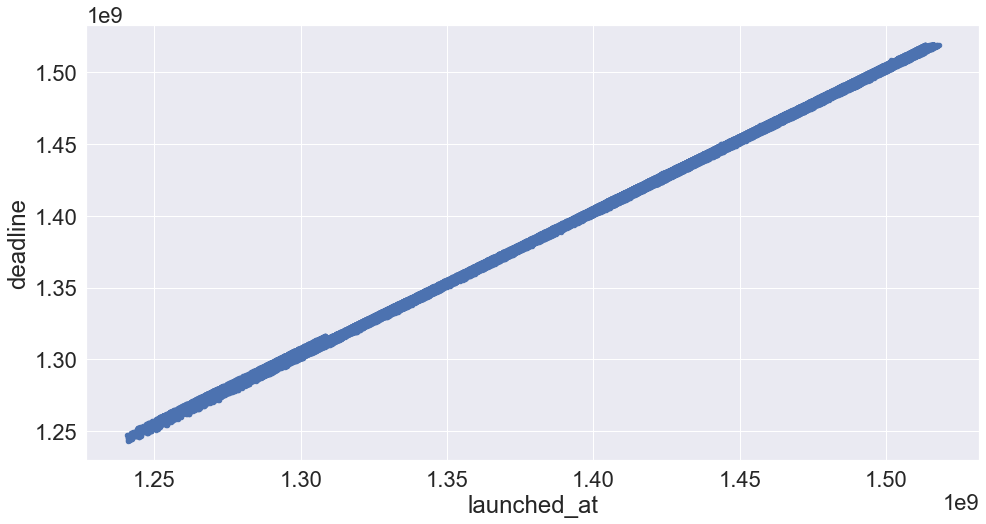

In [110]:
df.plot.scatter('launched_at', 'deadline')

<AxesSubplot:xlabel='funded', ylabel='goal'>

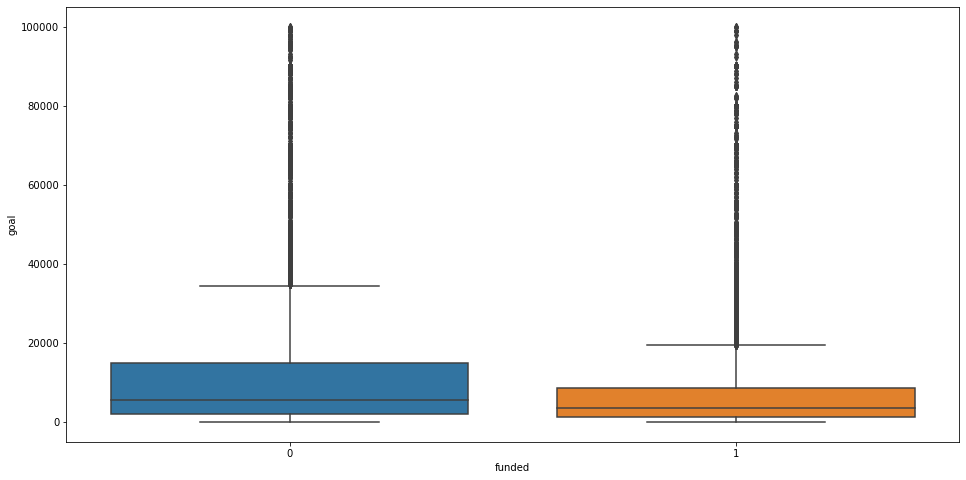

In [43]:
sns.boxplot(df['funded'].transform(int), df.goal[df['goal']<100000])

### Dealing with Null values

In [22]:
#Null values
df.isnull().sum()

project_id     0
blurb          2
category       0
country        3
created_at     0
currency       0
deadline       0
fx_rate        0
goal           0
launched_at    0
name           1
staff_pick     0
location       0
funded         0
subcategory    0
project_url    0
reward_url     0
dbl            0
dbd            0
dtype: int64

In total there are 2 blurbs, 3 countries, and 1 name missing. 

In [23]:
#Rows with null values
df[df.isnull().any(axis=1)]

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,funded,subcategory,project_url,reward_url,dbl,dbd
1857,KS_001857,"A light artist interested the universal urge to connect through mark making, I aim to travel and learn from the San Tribes of Namibia.",art,NaN,1492523493,USD,1499097394,1.000000,7000.0,1495209394,Ancient Rock Art and the San Tribes of Namibia,False,"Windhoek, Namibia",False,conceptual art,https://www.kickstarter.com/projects/1133917994/ancient-rock-art-and-the-san-tribes-of-namibia,https://www.kickstarter.com/projects/1133917994/ancient-rock-art-and-the-san-tribes-of-namibia/rewards,31,45
5423,KS_005423,NaN,art,US,1320612894,USD,1323061140,1.000000,35000.0,1320620155,NaN,False,"Milan, IN",False,painting,https://www.kickstarter.com/projects/1751437608/you-have-the-power-to-put-our-film-in-theaters,https://www.kickstarter.com/projects/1751437608/you-have-the-power-to-put-our-film-in-theaters/rewards,0,28
27780,KS_027780,NaN,fashion,DE,1504364375,EUR,1507625188,1.245664,15000.0,1505033188,Ready to wear,False,"Munich, Germany",False,ready-to-wear,https://www.kickstarter.com/projects/1303591875/serious-business-collection,https://www.kickstarter.com/projects/1303591875/serious-business-collection/rewards,7,30
46838,KS_046838,"We're from the Kavango Region in Namibia. We finished our high school degree, and now we are starting a butchery to pay for college.",food,NaN,1445612769,USD,1449950496,1.000000,1500.0,1447358496,Butcher Boys of Bagani,False,"Rundu, Namibia",True,food trucks,https://www.kickstarter.com/projects/823745415/butcher-boys-of-bagani,https://www.kickstarter.com/projects/823745415/butcher-boys-of-bagani/rewards,20,30
56883,KS_056883,"I am heading on a 5 Gyres Voyage in JAN 2011 to study plastic pollution in the South Atlantic Ocean with other activists, artists and scientists.",journalism,NaN,1286564530,USD,1291845600,1.000000,3500.0,1288295782,ON A BOAT to raise awareness on PLASTIC POLLUTION,False,"Walvis Bay, Namibia",True,journalism,https://www.kickstarter.com/projects/1639372997/on-a-boat-to-raise-awareness-on-plastic-pollution-0,https://www.kickstarter.com/projects/1639372997/on-a-boat-to-raise-awareness-on-plastic-pollution-0/rewards,20,41


In [24]:
# Median of the country column 
df.country.value_counts()

US    76716
GB     8015
CA     3511
AU     1793
DE      969
      ...  
AX        1
GQ        1
CW        1
ME        1
UY        1
Name: country, Length: 174, dtype: int64

Since US is the most occuring in the data, we fill the three missing values in the country columns with US.

In [66]:
# df.country = df.country.fillna(df.country.mode().iloc[0]) ####Done in clear.py

As for the 2 missing blurbs and 1 name, it happens to be that one row is missing both the blurb and the name, this will be dropped.

The other row is only missing the blurb, however after checking the link provided it happens to be that the information provided in the website is curropted such that the information about that campaing are not available, hence this also will be dropped.

In [26]:
# the rows before 
df[df.isnull().any(axis=1)] 

,project_id,blurb,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,staff_pick,location,funded,subcategory,project_url,reward_url,dbl,dbd
5423,KS_005423,NaN,art,US,1320612894,USD,1323061140,1.000000,35000.0,1320620155,NaN,False,"Milan, IN",False,painting,https://www.kickstarter.com/projects/1751437608/you-have-the-power-to-put-our-film-in-theaters,https://www.kickstarter.com/projects/1751437608/you-have-the-power-to-put-our-film-in-theaters/rewards,0,28
27780,KS_027780,NaN,fashion,DE,1504364375,EUR,1507625188,1.245664,15000.0,1505033188,Ready to wear,False,"Munich, Germany",False,ready-to-wear,https://www.kickstarter.com/projects/1303591875/serious-business-collection,https://www.kickstarter.com/projects/1303591875/serious-business-collection/rewards,7,30


In [26]:
# df = df.drop([5423, 27780]) ###Done in clear.py

In [24]:
df.blurb[df.blurb.str.isnumeric()]

31717    1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
50117                                                                                                       1
Name: blurb, dtype: object

In [ ]:
# remove float numbers from blurb
# df = df.drop([31717, 50117]) ###Done in clear.py

## Outliers detection and handeling

The numerical features are :

 ['created_at', 'deadline', 'goal', 'launched_at']

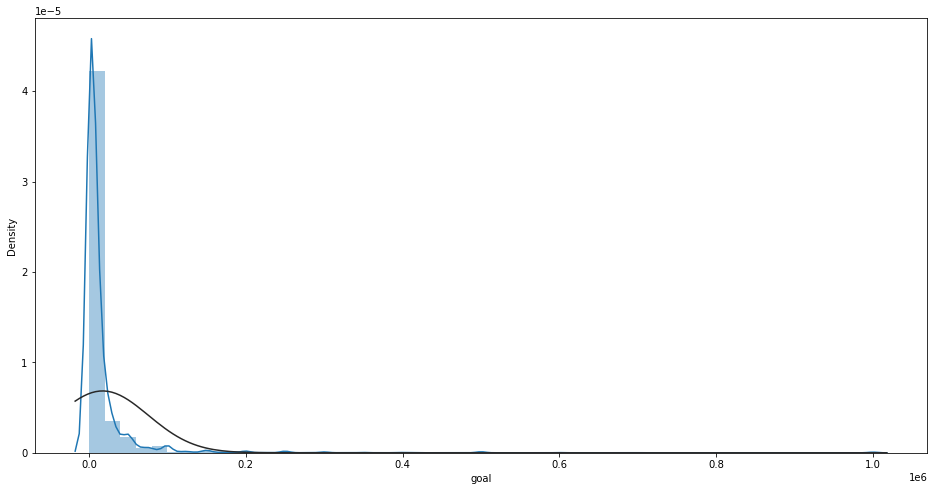

In [160]:
sns.distplot(df.goal, fit = norm);

In [100]:
print(f'goals higher than 1 million: {len(df.goal[df.goal > 1000000])}')
print(f'goals lower than 2: {len(df.goal[df.goal <= 5])}')

# pos_idx = df[df['funded'] == True].index.tolist()
x = df[df.goal > 1000000]
y = df[df.goal <= 5 ]
print(f'Out of the {len(df.goal[df.goal > 1000000])} projects who have goals higher than 1 million, {len(x[x.funded == True])} projects got funded')
print(f'Out of the {len(df.goal[df.goal <= 5])} projects who have goals lower than 5, {len(y[y.funded == True])} projects got funded')

goals higher than 1 million: 0
goals lower than 2: 186
Out of the 0 projects who have goals higher than 1 million, 0 projects got funded
Out of the 186 projects who have goals lower than 5, 163 projects got funded


Hence, projects having higher than 1 million goal will be removed, but lower than 5 will not

In [99]:
# df = df.drop(df[df.goal > 1000000].index.tolist()) ##### Done in clean.py

<AxesSubplot:xlabel='launched_at', ylabel='Density'>

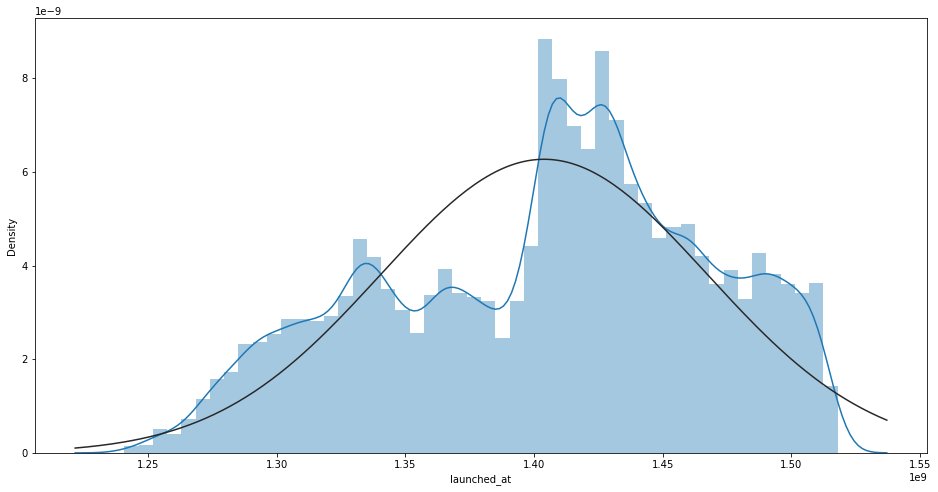

In [107]:
sns.distplot(df.launched_at, fit = norm)

<AxesSubplot:xlabel='created_at', ylabel='Density'>

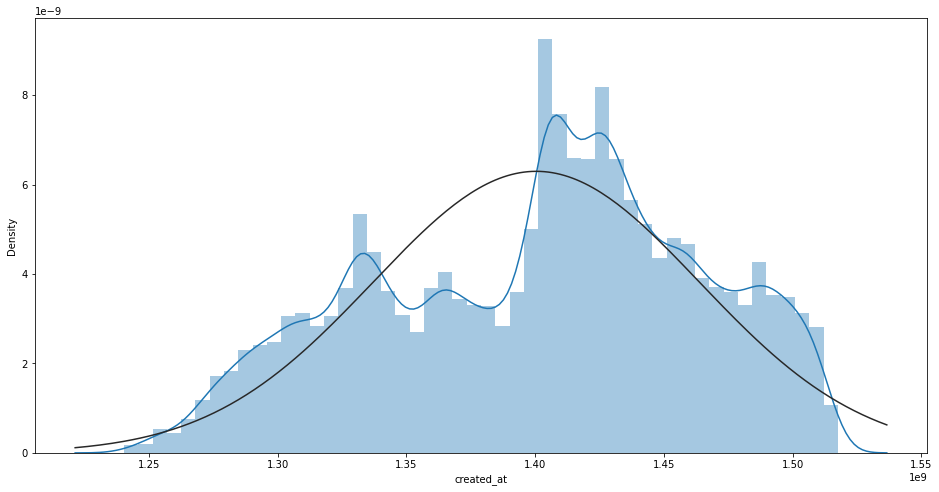

In [108]:
sns.distplot(df.created_at, fit = norm)

<AxesSubplot:xlabel='deadline', ylabel='Density'>

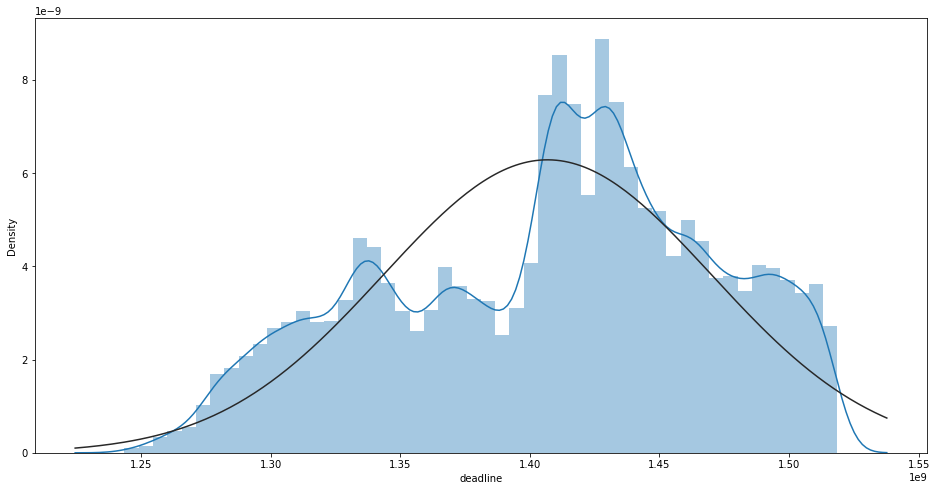

In [109]:
sns.distplot(df.deadline, fit = norm)

We can note that the above three features (created_at, launched_at, deadline) are not normally distributed. Those will be handled again in the feature derivation section below. Two features will be made out of the three, namely dbl(days before launch) and dbd (days before deadline)

# Feature derivation:

In [143]:
# days before launching
# df['dbl'] = df.apply(lambda x: (datetime.fromtimestamp(x.launched_at - x.created_at) - datetime.fromtimestamp(0)).days , axis=1)
df['dbl'] = df.apply(lambda x: (x.launched_at - x.created_at)/3600 , axis=1)


<AxesSubplot:xlabel='dbl', ylabel='Density'>

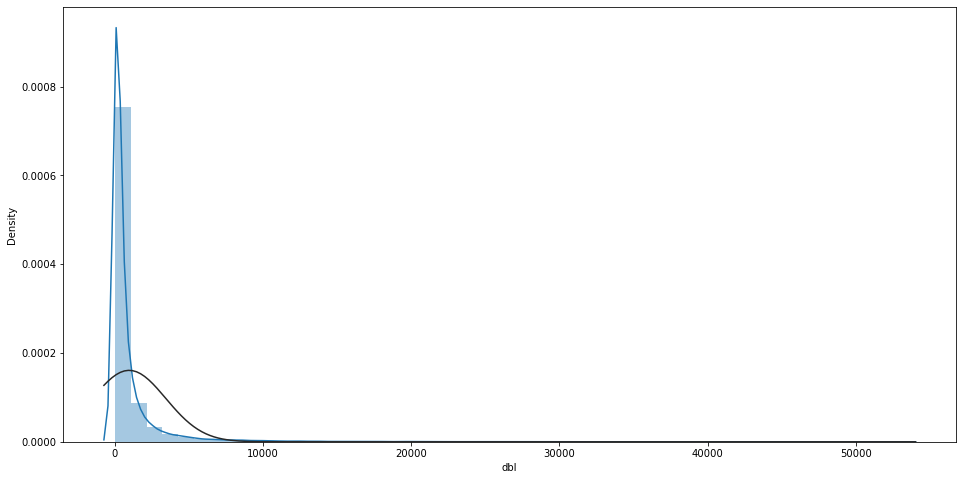

In [144]:
sns.distplot(df.dbl, fit = norm)

((array([-4.34547437, -4.14667474, -4.03854522, ...,  4.03854522,
          4.14667474,  4.34547437]),
  array([6.25000000e-02, 6.55555556e-02, 6.55555556e-02, ...,
         4.80743078e+04, 4.91289458e+04, 5.32838933e+04])),
 (1508.426507384163, 956.908605873069, 0.6085062318106464))

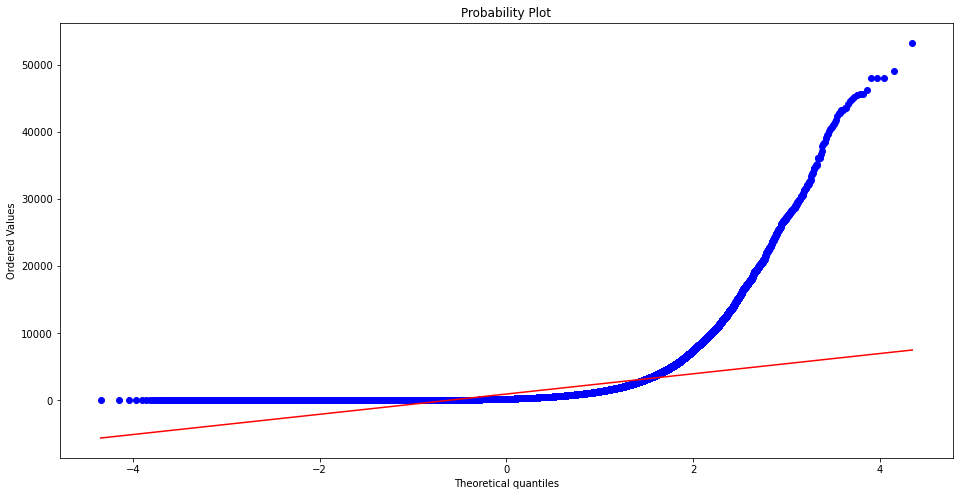

In [145]:
stats.probplot(df.dbl, plot=plt)

<AxesSubplot:xlabel='log_dbl', ylabel='Density'>

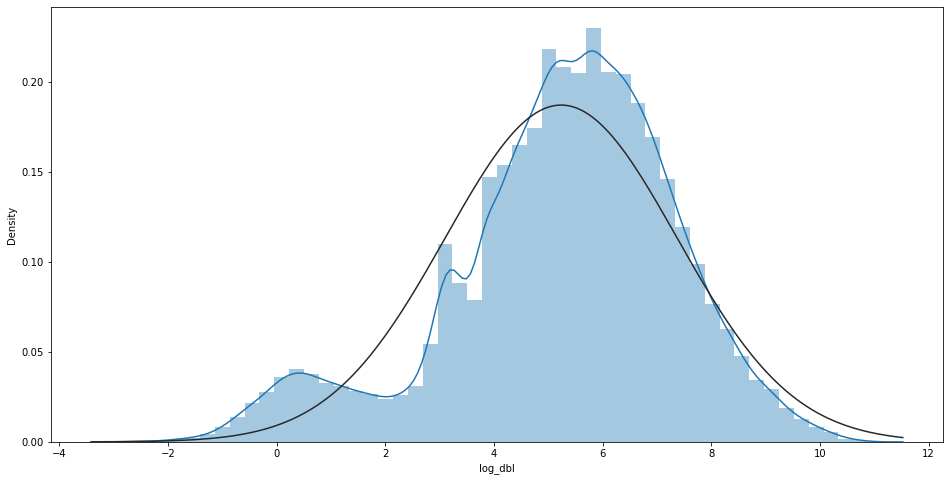

In [146]:

df['log_dbl']=df['dbl'].apply(lambda x: np.log(x) if x != 0 else np.log(0.1))
sns.distplot(df.log_dbl, fit = norm)


((array([-4.34547437, -4.14667474, -4.03854522, ...,  4.03854522,
          4.14667474,  4.34547437]),
  array([-2.77258872, -2.72485732, -2.72485732, ..., 10.78050317,
         10.80220367, 10.88338938])),
 (2.0962670302749844, 5.236105917174187, 0.9839335993908069))

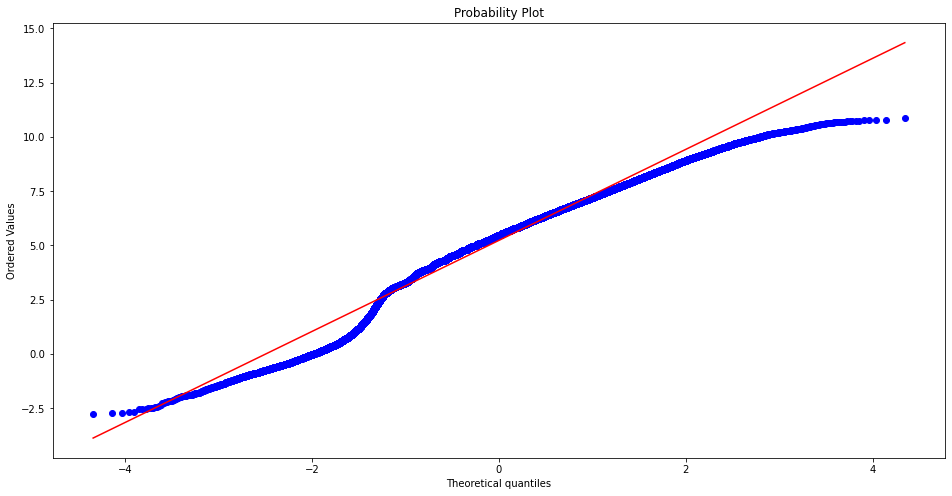

In [147]:
stats.probplot(df.log_dbl, plot=plt)

In [148]:
# days before deadline 
# df['dbd'] = df.apply(lambda x: (datetime.fromtimestamp(x.deadline - x.launched_at) - datetime.fromtimestamp(0)).days , axis=1)
df['dbd'] = df.apply(lambda x: (x.deadline - x.launched_at)/3600 , axis=1)

<AxesSubplot:xlabel='dbd', ylabel='Density'>

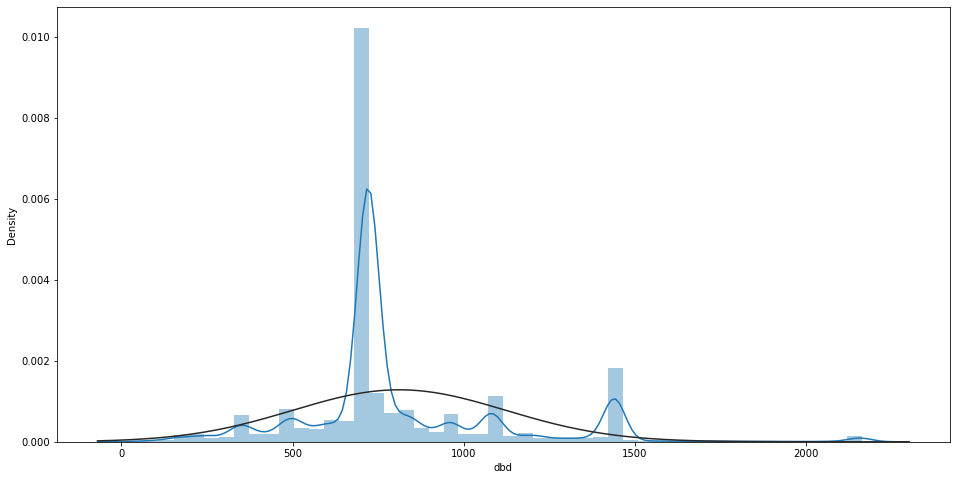

In [149]:
sns.distplot(df.dbd, fit = norm)

((array([-4.34547437, -4.14667474, -4.03854522, ...,  4.03854522,
          4.14667474,  4.34547437]),
  array([  24.,   24.,   24., ..., 2207., 2207., 2207.])),
 (283.5873562501325, 811.5934437165209, 0.9133742782306229))

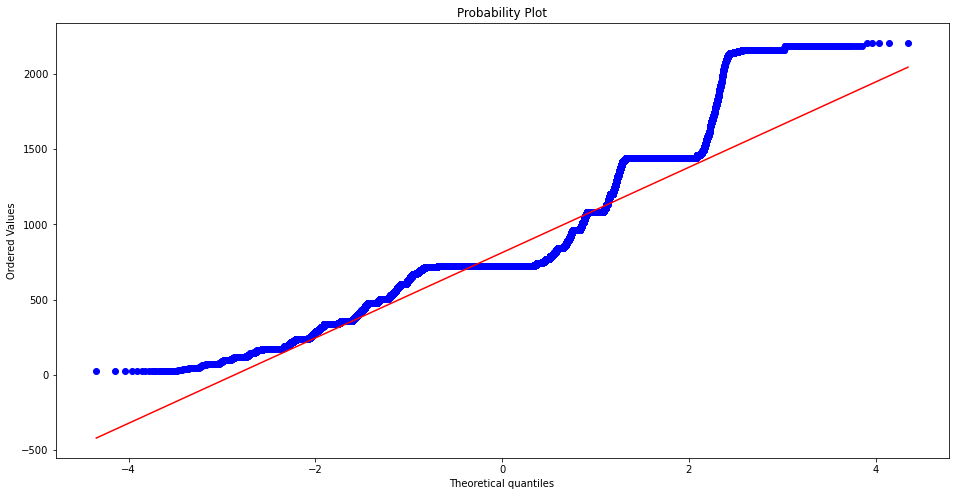

In [150]:
stats.probplot(df.dbd, plot=plt)

# TODO: normilze dbd

<AxesSubplot:xlabel='log_dbd', ylabel='Density'>

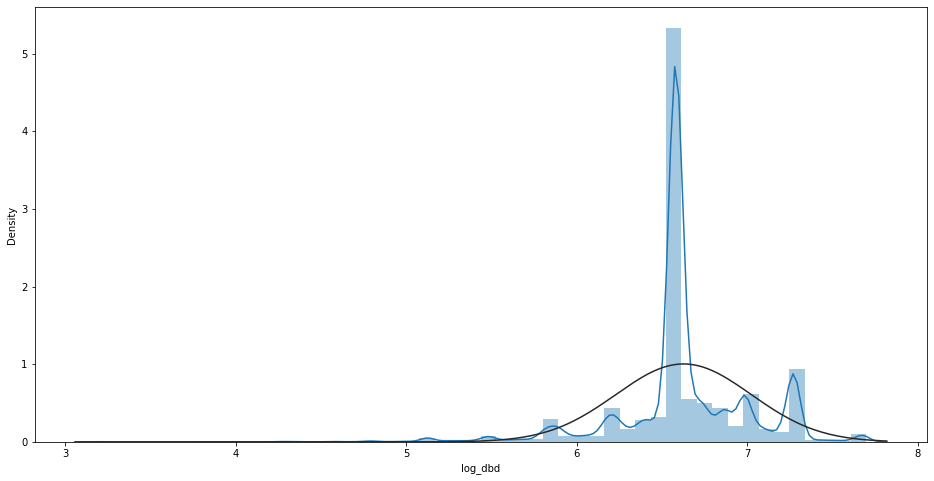

In [151]:
df['log_dbd']=df['dbd'].apply(lambda x: np.log(x) if x != 0 else np.log(0.1))
sns.distplot(df.log_dbd, fit = norm)

((array([-4.34547437, -4.14667474, -4.03854522, ...,  4.03854522,
          4.14667474,  4.34547437]),
  array([3.17805383, 3.17805383, 3.17805383, ..., 7.69938941, 7.69938941,
         7.69938941])),
 (0.3664348146571175, 6.626793278672292, 0.9218268685903045))

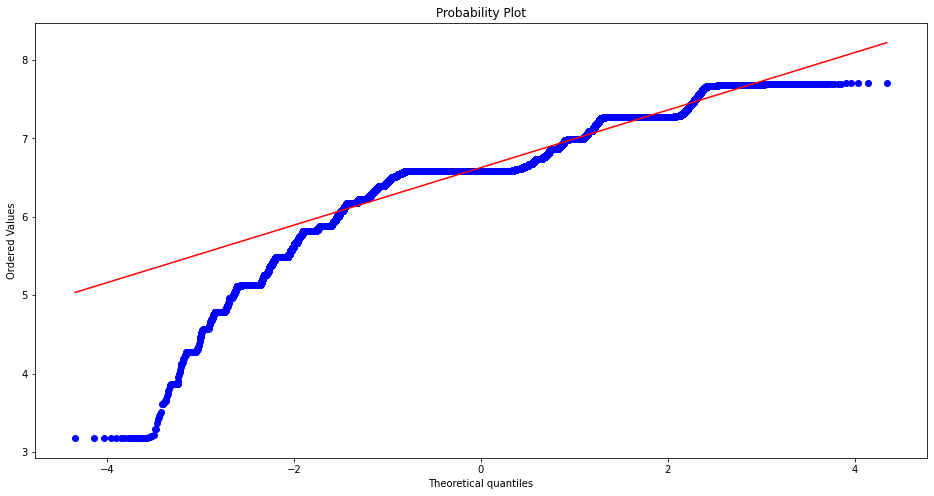

In [153]:
stats.probplot(df.log_dbd, plot=plt)

((array([-4.34547437, -4.14667474, -4.03854522, ...,  4.03854522,
          4.14667474,  4.34547437]),
  array([8.74495329e-05, 8.74495329e-05, 8.74495329e-05, ...,
         8.04171330e-03, 8.04171330e-03, 8.04171330e-03])),
 (0.0010333159103987262, 0.0029572278159957013, 0.9133742782306239))

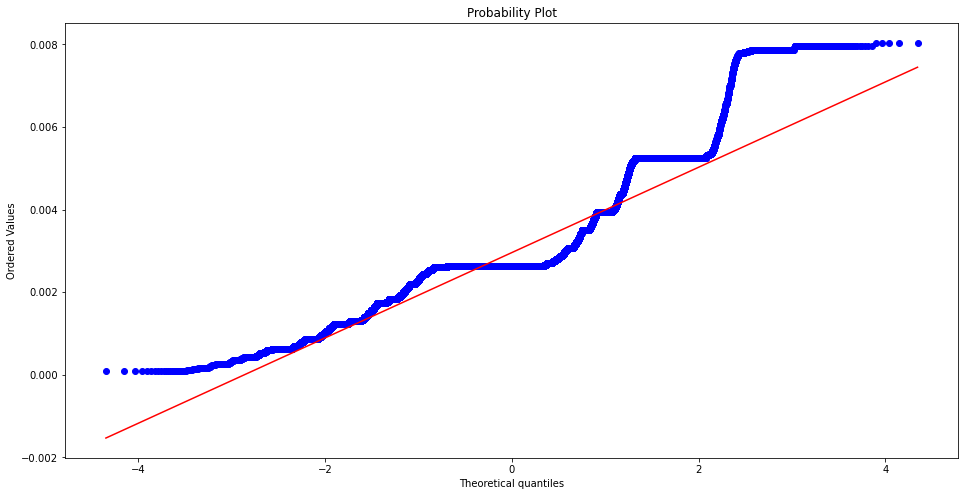

In [159]:
from sklearn import preprocessing
import numpy as np
# x_array = np.array([2,3,5,6,7,4,8,7,6])

# df['log_dbd']=df['dbd'].apply(lambda x: np.log(x) if x != 0 else np.log(0.1))
normalized_arr = preprocessing.normalize([df['dbd']])
stats.probplot(normalized_arr[0], plot=plt)

# Data Transformation:

In [11]:
df = clean.remove_unneeded(df)

The categorical features are :

 ['blurb', 'category', 'country', 'currency', 'name', 'location', 'subcategory']


In [56]:

enc = preprocessing.OneHotEncoder()

In [62]:
def encode(feature):
    enc = preprocessing.OneHotEncoder()
    enc.fit(np.asarray(df[feature]).reshape(-1, 1))
    encoded_feature = enc.transform(np.asarray(df[feature]).reshape(-1,1))
#     print(encoded_feature.shape)
#     enc.get_feature_names()
    return encoded_feature

In [63]:
df.funded = encode('funded')

In [64]:
df.category = encode('category')

In [65]:
df.subcategory = encode('subcategory')
df.country = encode('country')
df.currency = encode('currency')
df.location = encode('location')

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab

# text = clean.clean(df, False, 'blurb').blurb
# vectorizer.fit(text)

# summarize
# print(vectorizer.vocabulary_)
# print(vectorizer.idf_)
# encode document

# vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(99996, 59227)


MemoryError: Unable to allocate 44.1 GiB for an array with shape (99996, 59227) and data type float64

In [29]:
from scipy import sparse
# type(csr_matrix.todense(vector))
# f['vec_blurb'] = vector
# sparse.save_npz("Csr_sparse_matrix_blurb.npz", vector)

matrix_back = sparse.load_npz("Csr_sparse_matrix_blurb.npz")

## TODO: Name should be vectorized (not tfidf)

# Modelling:

# Evaluation: